In [2]:
%load_ext autoreload

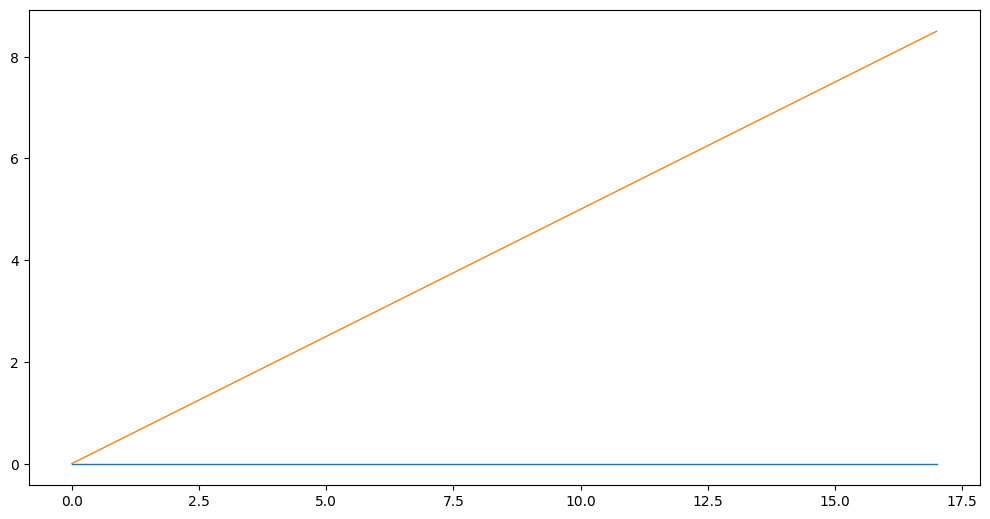

In [3]:
%autoreload 2

import matplotlib.pyplot as plt
import torch

from torchdrive.tasks.diff_traj import compute_dream_pos

plt.rcParams['lines.linewidth'] = 1
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.autolayout"] = True

seq_len = 18

fig = plt.figure()

traj_a = torch.stack([torch.arange(seq_len), torch.zeros(seq_len)], dim=-1).float()
traj_b = torch.stack([torch.arange(seq_len), torch.arange(seq_len)/2], dim=-1).float()


plt.plot(traj_a[..., 0], traj_a[..., 1], label="a")
plt.plot(traj_b[..., 0], traj_b[..., 1], label="b")
plt.gca().set_aspect("equal")


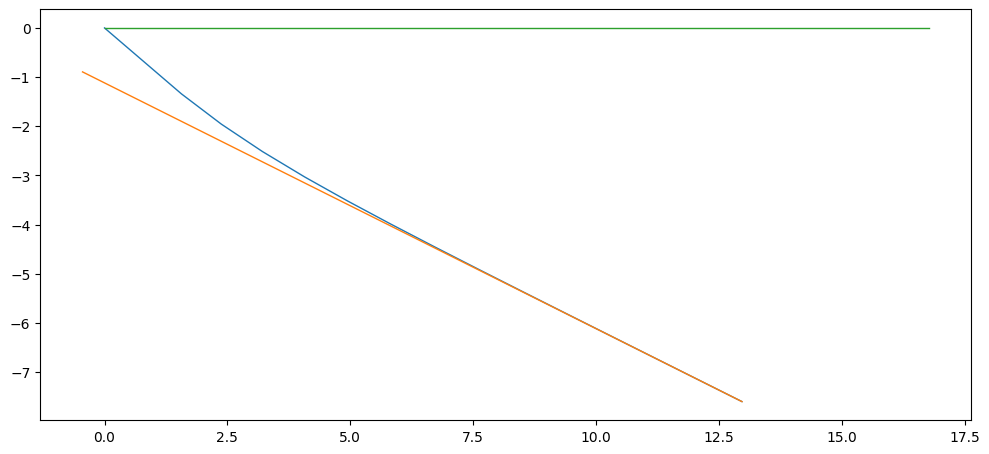

In [4]:
%autoreload 2

from torchdrive.tasks.diff_traj import compute_dream_pos

positions = traj_a.unsqueeze(0)
mask = torch.ones_like(positions)
pred_traj = traj_b.unsqueeze(0)
dream_targ, dream_mask, positions, pred_traj = compute_dream_pos(positions, mask, pred_traj)

plt.plot(dream_targ[0, ..., 0], dream_targ[0, ..., 1], label="targ")
plt.plot(positions[0, ..., 0], positions[0, ..., 1], label="positions")
plt.plot(pred_traj[0, ..., 0], pred_traj[0, ..., 1], label="pred_traj")
plt.gca().set_aspect("equal")

torch.Size([10, 18]) torch.Size([10, 1])


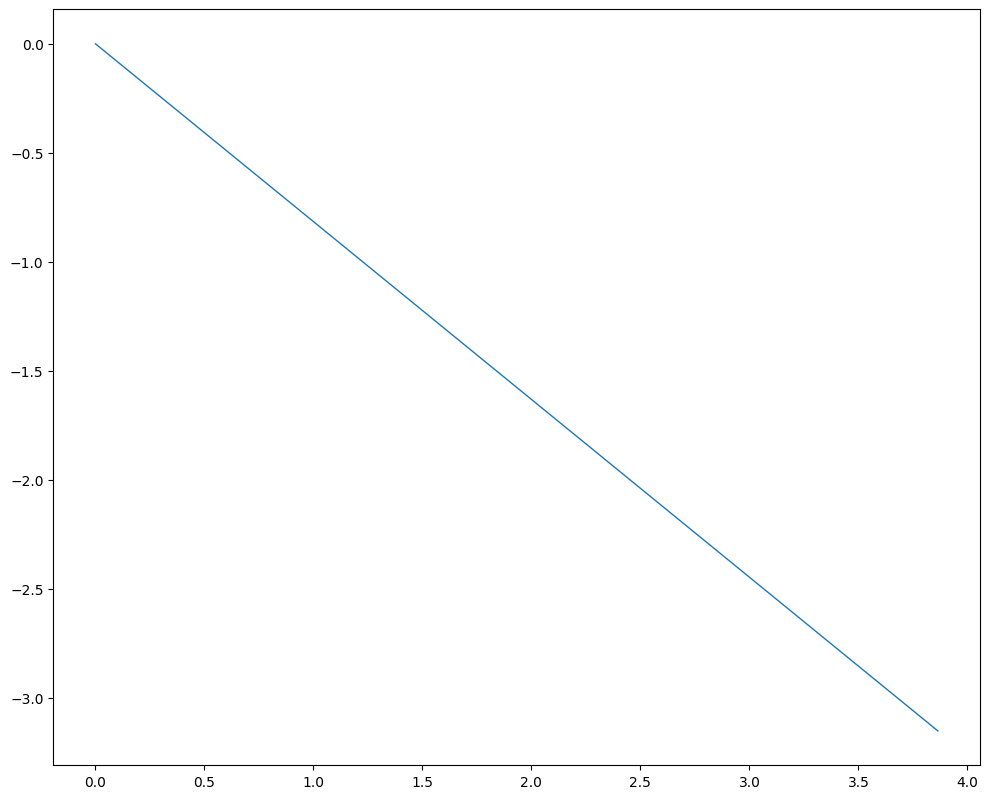

In [80]:
%autoreload 2
from torchdrive.tasks.diff_traj import random_traj

BS = 10
vel = torch.ones(BS, 1)
traj = random_traj(BS=BS, seq_len=seq_len, device="cpu", vel=vel)

traj = traj[0]

plt.plot(traj[..., 0], traj[..., 1], label="a")
plt.gca().set_aspect("equal")